**`COPYRIGHT(C) 2023 THE CYBER UNIVERSITY OF KOREA ALL RIGHTS RESERVED.`**

본 파일의 외부 배포를 금지합니다.

# 1번과제 - Autoencoder와 Variational Autoencoder (33점)


**템플릿**  
1번 과제의 템플릿 코드는 최종 과제와의 비교를 위해서 필요하므로 수정하지 않도록 합니다.  

Metal device set to: Apple M1


2023-12-07 13:03:59.071777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-07 13:03:59.072382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2023-12-07 13:04:00.156126: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-07 13:04:00.630231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 2s 31ms/step - loss: 0.1828
Epoch 2/200
32/32 [==============================] - 1s 25ms/step - loss: 0.0809
Epoch 3/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0678
Epoch 4/200
32/32 [==============================] - 1s 21ms/step - loss: 0.0633
Epoch 5/200
32/32 [==============================] - 1s 19ms/step - loss: 0.0588
Epoch 6/200
32/32 [==============================] - 1s 27ms/step - loss: 0.0571
Epoch 7/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0560
Epoch 8/200
32/32 [==============================] - 1s 21ms/step - loss: 0.0551
Epoch 9/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0542
Epoch 10/200
32/32 [==============================] - 1s 26ms/step - loss: 0.0535
Epoch 11/200
32/32 [==============================] - 0s 15ms/step - loss: 0.0530
Epoch 12/200
32/32 [==============================] - 1s 19ms/step - loss: 0.0526
Epoch 13/200
32/32 [=================

2023-12-07 13:05:49.623291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 3ms/step


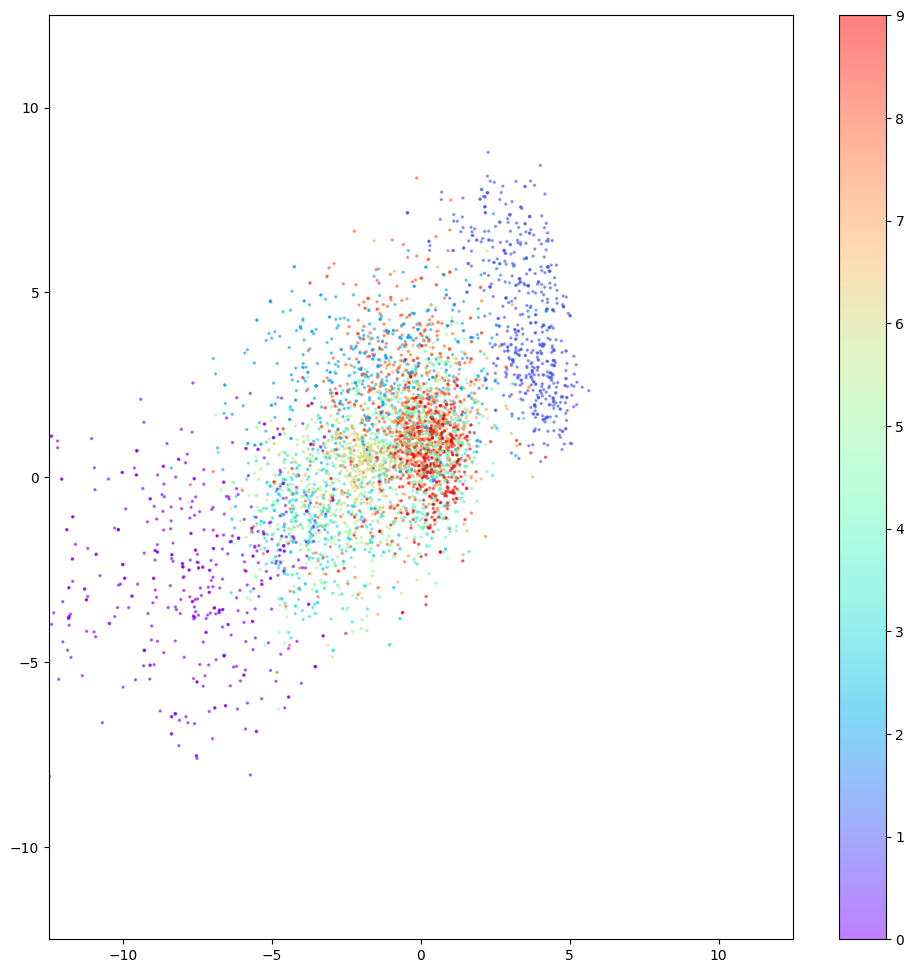

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import os

# 재현 가능한 난수 생성
np.random.seed(0)
tf.keras.utils.set_random_seed(0)

z_dim = 2

# 여기에 SamplingLayer를 추가합니다.

# `tf.keras.backend.random_normal` 함수는 무엇을 하는 것인지 직접 찾아보고 적어주세요.
ans01 = """
여기에 기입하세요.
"""

# `tf.keras.backend.random_normal` 함수를 호출할 때 `shape=(batch, dim)`으로 설정하였습니다.
#  이렇게 `shape`을 지정한 이유에 대해 적어주세요.
ans02 = """
여기에 기입하세요.
"""

encoder_input = keras.Input(shape=(28, 28, 1), name='encoder_input')
x = Conv2D(32, 3, strides=1, padding="same", name='encoder_conv_0')(encoder_input)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=1, padding="same", name='encoder_conv_3')(x)
x = LeakyReLU()(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
# VAE를 위하여 mu와 log_var를 출력하고 Sampling Layer를 통하여 z를 출력하도록 변경합니다.
encoder_output= Dense(z_dim, name='encoder_output')(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=1, padding="same", name='decoder_conv_t0')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(1, 3, strides=1, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class AutoEncoder(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    def call(self,inputs):
        latent = self.encoder(inputs)
        return self.decoder(latent)

@tf.function
def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

# 여기에 VAEModel 코드를 추가합니다.

LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 200

# AutoEncoder에서 VAEModel로 model을 변경합니다.
model = AutoEncoder(encoder, decoder)

# 다음 코드에서, compile시에 loss 부분은 삭제합니다.
# VAEModel의 경우 model의 train_step()에서 직접 손실함수를 계산하기 때문입니다.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss=r_loss)

# mnist 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

model.fit(x_train[:1000], x_train[:1000], epochs=EPOCHS, batch_size=BATCH_SIZE)

n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# VAEModel의 encoder의 경우 mu, log_var, z_points의 3개가 출력되므로, 그에 맞도록 다음 줄의 코드를 수정합니다.
z_points = model.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.xlim(-12.5, 12.5)
plt.ylim(-12.5, 12.5)
plt.show()

ans03 = z_points.copy()

# Autoencoder와 비교해서 latent vector의 분포가 어떻게 달라졌는지를 ans04에 기입합니다.
ans04 = """
여기에 기입하세요.
"""

# 분포가 VAE처럼 변화될 경우 Autoencoder보다 어떤 장점이 있는 지를 ans05에 기입합니다.
ans05 = """
여기에 기입하세요.
"""

**과제 내용**  

**1. Autoencoder**    

템플릿의 코드는 MNIST 필기체 이미지의 autoencoder입니다.
(12주차 실습파일인 `11_gan.ipynb`에 포함된 것과 거의 동일합니다.)  
입력 이미지 input_image가 입력될 때, 인코더는 2차원의 latent vector $z$를 출력합니다.  
`z = model.encoder(input_image)`  
이 latent vector $z$를 decoder에 입력하면, 생성이미지 reconst_image가 출력됩니다.  
`reconst_image = model.decoder(z)`  
    
Loss는 추론값인 `reconst_image`와 참값이자 입력값인 `input_image`와의 Mean Squared Error로 정의하였습니다.  
    
학습이 완료된 후, test set에서 `n_to_show = 5000`만큼의 이미지를 무작위로 추출하여,
encoder의 출력값인 `z`를 얻고, 그것을 2차원에 출력한 결과를 그래프로 표시하였습니다.  
템플릿 코드를 실행하고 다시한번 코드와 그 결과를 리뷰합시다.  

**2. Variational Autoencoder(VAE)로의 전환을 위한 Sampling 레이어의 정의 추가**   

VAE는 encoder의 마지막 부분에서 $z$ 대신에 $\mu$와 $\sigma$라는 두 개의 텐서를 출력합니다.  
실제로는 $\sigma$ 대신에 분산의 로그값인 $\log\sigma^2$ (log of variance)로 대신합니다.  
왜일까요?  
$\sigma$는 표준편차로서 0보다 커야한다는 조건이 있는데, 신경망의 출력에서 제어하기 어렵습니다.    
또한 KL divergence의 식에서 $\log\sigma^2$ 항이 있는데 이 항은 $\sigma$가 0에서 $-\infty$가 되어서 네트워크에 부동소수점 오류를 일으키기 쉽습니다.  
따라서 $V\equiv\log\sigma^2$를 신경망의 출력값으로 정하고 그 대신에 $\sigma^2$은 $\exp(V)$로, $\sigma$는 $\exp(V/2)$로 계산하면 손실함수 계산에서 부동소수점 오류없이 계산이 가능해집니다. ($V$값은 $-\infty$부터 $+\infty$의 값을 가질 수 있기 때문입니다.)    
이제 표준정규분포에서 임의의 수 $\epsilon$를 sampling하고, $\mu$와 $\log\sigma^2$를 이용하여 $z = \mu+\sigma\epsilon$를 만드는 Sampling Layer를 정의하겠습니다.  
(실습파일 `12_deepfake.ipynb`에서 정의했던 것과 동일합니다.)
```python
class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon
```
위의 sampling layer 코드를 읽고 이해해 봅시다.  
`tf.keras.backend.random_normal` 함수는 무엇을 하는 것인지 직접 찾아보고 `ans01`에 기입합니다.  
`tf.keras.backend.random_normal` 함수를 호출할 때 `shape=(batch, dim)`으로 설정하였습니다.  
이렇게 `shape`을 지정한 이유에 대해 `ans02`에 기입합니다.  
`random_normal()`함수에 대한 기본적인 개념은 다음의 코드를 참조하세요.(두번째 섹션)  
https://colab.research.google.com/github/kotech1/computervision/blob/master/appendix/12_norm_gradient.ipynb#scrollTo=2AHB-LtQajIN  
Sampling layer 코드를 과제 기입란에 추가합니다.
    
**3. VAE 전환을 위하여 encoder 모델의 변경**    

템플릿의 Autoencoder의 encoder부분의 마지막 코드는 다음과 같습니다.
Flatten 레이어 다음에 Latent space의 차원(z_dim)으로 축소하기위해 FC(Dense레이어)를 이용합니다.
```python
encoder_output= Dense(z_dim, name='encoder_output')(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
```
위의 코드를 다음과 같이 변경합니다.
```python
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder_output = [mu, log_var, z]
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
```
VAE를 위하여 두개의 출력($\mu$, $\log\sigma^2$)을 각각 `Dense()`를 이용하여 만들고,  
이것을 입력으로하는 Sampling 레이어를 통과하여 z를 출력합니다.  
encoder의 출력은 Autoencoder의 경우는 $z$(`encoder_output`)뿐이었으나, VAE의 경우에는  
$\mu$, $\log\sigma^2$, $z$의 3개 텐서를 출력합니다.  
$z$는 decoder의 입력으로 사용이 되고 $\mu$와 $\log\sigma^2$는 손실함수의 계산에 사용됩니다.  
이 코드는 모두 실습 시간에 다루었던 내용입니다.  
    
**4. VAEModel의 정의**  

이제 전체 VAE 모델을 정의하고 코드에 추가합니다.
```python
class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean( # batch에 대해 평균
                tf.reduce_sum( # 이미지의 각 pixel에 대해 합산
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)
```
가장 크게 달라진 점은 `train_step()`의 재정의 부분입니다.  
`train_step()`은 모델이 학습될 때 한번의 batch마다 호출되는 기본 학습 함수입니다.  
보통의 모델에서는 `keras.Model` 객체에 정의된 기본 모듈을 호출하는 것으로 충분하였습니다.  
(우리가 `model.fit()`을 호출하면 batch마다 `keras.Model`에 정의된 `train_step()`이 내부적으로 호출됩니다.)  
VAE에서는 이것을 customize해야 합니다.  
이것은 손실함수가 보통의 경우 $\hat y$(추론결과)와 $y$(참값)만으로 계산되는 것에 비해서,  
VAE에서는 KL divergence 손실 항 때문에, $\mu$와 $\log\sigma^2$라는 모델의 중간 출력(여기서는 encoder부분의 출력)을  
사용해야 하기 때문입니다.  

`with Gradient.tape()`으로 둘러쌓여진 코드는 손실함수를 계산하는 부분입니다.  
손실함수를 계산하면서 그 미분(gradient)을 추적할 수 있도록 합니다.  
`grads = tape.gradient(...)`는 gradient 값을 계산하는 부분입니다.  
keras에서의 gradient를 계산하는 부분은 다음의 예제 코드를 보시면 쉽게 이해하실 수 있습니다.  
https://colab.research.google.com/github/kotech1/computervision/blob/master/appendix/12_norm_gradient.ipynb#scrollTo=4gromgOST0am  
`self.optimizer.apply_gradients()`는 계산된 각 gradient 값을 해당 weights에 optimizer를 이용하여 변경하는 부분입니다.  
이 부분이 실제 학습 parameter가 update되는 부분이라고 하겠습니다.  

관심있으신 분들은 `train_step()`의 원래 소스도 한번 비교해 봐 주십시오.  
https://github.com/keras-team/keras/blob/master/keras/engine/training.py  
1016줄부터 1050줄까지가 해당 함수입니다.  
거의 유사한 구조로 되어있음을 알 수 있습니다.  

이제 모델 생성 부분을 `Autoencoder()`에서 새로 정의한 `VAEModel()`로 다음과 같이 변경합니다.
```python
#model = AutoEncoder(encoder, decoder) #삭제 처리
model = VAEModel(encoder, decoder) # VAEModel로 변경
```

`model.compile()`부분에서 loss를 지정한 부분을 빼도록 합시다.  
VAE모델에서는 손실함수를 `train_step()`에서 직접 처리하였으므로 손실함수의 지정이 필요없기 때문입니다.  
다음과 같이 `model.compile()` 호출 부분을 수정합니다.  
```python
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))
```

`example_images`를 이용해서 latent 벡터를 호출하는 부분을 다음과 같이 변경합니다.  
VAE용 encoder에서는 z만 반환하는 것이 아니라, `mu`, `log_var`, `z`의 3개 텐서를 tuple로 반환하기 때문입니다.  
```python
#z_points = model.encoder.predict(example_images) # Autoencoder용
_,_,z_points = model.encoder.predict(example_images) # VAE용
```
생성된 `z_points`의 복사본을 `ans03`에 저장합니다. (이미 템플릿에 코드가 포함되어 있습니다.)  
    
    
**4. VAE의 결과 분석**  

이제 변경된 코드를 실행하고 결과를 분석합니다.  
Autoencoder와 비교해서 latent vector의 분포가 어떻게 달라졌는지를 `ans04`에 기입합니다.  
이렇게 분포가 VAE처럼 변화될 경우 Autoencoder보다 어떤 장점이 있는 지를 `ans05`에 기입합니다.
    

**과제 기입란**

Metal device set to: Apple M1


2023-12-07 13:55:37.321471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-07 13:55:37.321945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2023-12-07 13:55:38.381344: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-07 13:55:38.855583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must 

31/32 [============================>.] - ETA: 0s - loss: 434.5300 - reconstruction_loss: 426.3739 - kl_loss: 8.1561

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<8x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<8x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformance

32/32 [==============================] - 7s 56ms/step - loss: 423.4008 - reconstruction_loss: 415.3352 - kl_loss: 8.0656
Epoch 2/200
32/32 [==============================] - 1s 22ms/step - loss: 222.7532 - reconstruction_loss: 219.2715 - kl_loss: 3.4817
Epoch 3/200
32/32 [==============================] - 1s 23ms/step - loss: 207.0525 - reconstruction_loss: 203.9869 - kl_loss: 3.0656
Epoch 4/200
32/32 [==============================] - 1s 23ms/step - loss: 198.2723 - reconstruction_loss: 195.2162 - kl_loss: 3.0562
Epoch 5/200
32/32 [==============================] - 1s 22ms/step - loss: 189.1106 - reconstruction_loss: 185.3770 - kl_loss: 3.7336
Epoch 6/200
32/32 [==============================] - 1s 23ms/step - loss: 184.4498 - reconstruction_loss: 180.6859 - kl_loss: 3.7638
Epoch 7/200
32/32 [==============================] - 1s 29ms/step - loss: 182.9329 - reconstruction_loss: 179.2135 - kl_loss: 3.7194
Epoch 8/200
32/32 [==============================] - 1s 22ms/step - loss: 178.929

2023-12-07 13:58:09.629778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 4ms/step


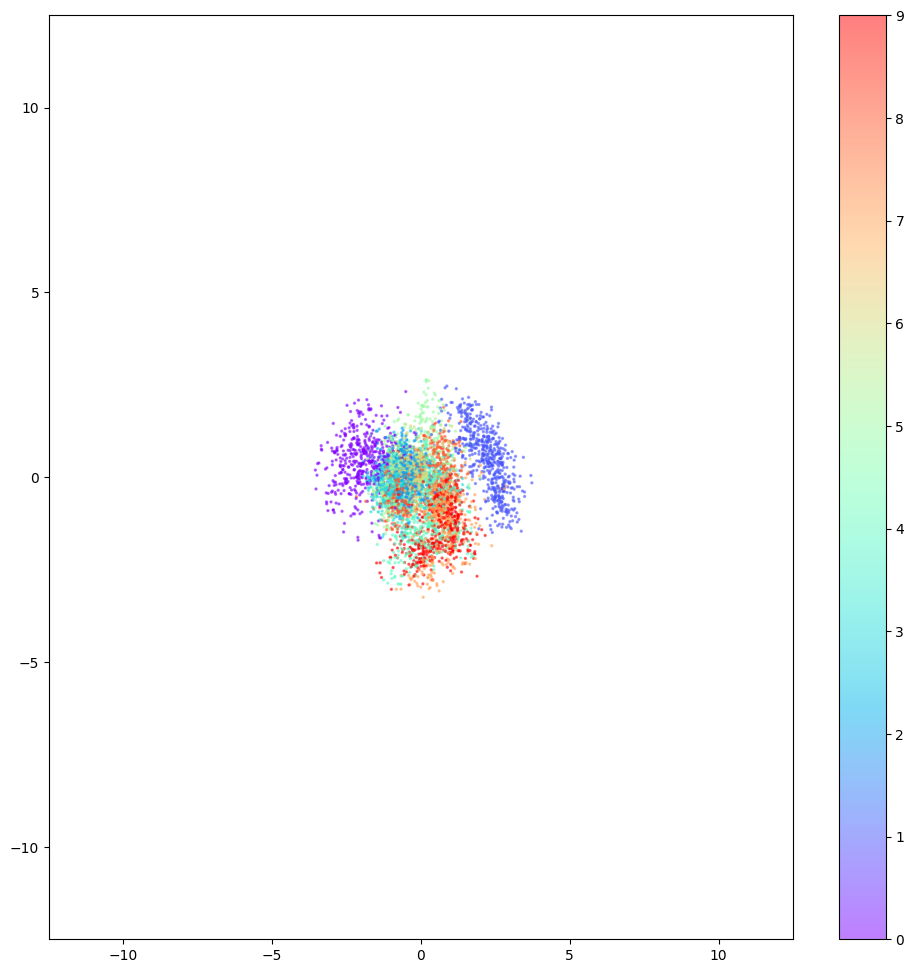

In [1]:
# 여기에 템플릿을 복사하고 수정하여 완성합니다.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import os

# 재현 가능한 난수 생성
np.random.seed(0)
tf.keras.utils.set_random_seed(0)

z_dim = 2

# 여기에 SamplingLayer를 추가합니다.
class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon
    
# `tf.keras.backend.random_normal` 함수는 무엇을 하는 것인지 직접 찾아보고 적어주세요.
ans01 = """
정규 분포에서 랜덤한 값을 가지는 텐서를 생성합니다
"""

# `tf.keras.backend.random_normal` 함수를 호출할 때 `shape=(batch, dim)`으로 설정하였습니다.
#  이렇게 `shape`을 지정한 이유에 대해 적어주세요.
ans02 = """
배치 단위로 처리: VAE에서는 일반적으로 배치(batch) 단위로 데이터를 처리합니다. 즉, 여러 데이터 샘플에 대한 샘플링을 한 번에 수행하고자 합니다. shape=(batch, dim)은 한 번에 여러 샘플을 처리할 수 있도록 하며, 각 샘플은 dim 차원의 잠재 변수를 갖습니다.
변수의 차원과 일치: 모델의 변수의 차원은 dim이므로, 샘플링한 값을 이 변수에 더해주는 연산이 일관성 있게 이루어지도록 shape을 지정합니다.
"""

encoder_input = keras.Input(shape=(28, 28, 1), name='encoder_input')
x = Conv2D(32, 3, strides=1, padding="same", name='encoder_conv_0')(encoder_input)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=1, padding="same", name='encoder_conv_3')(x)
x = LeakyReLU()(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
# VAE를 위하여 mu와 log_var를 출력하고 Sampling Layer를 통하여 z를 출력하도록 변경합니다.
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder_output = [mu, log_var, z]
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=1, padding="same", name='decoder_conv_t0')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(1, 3, strides=1, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class AutoEncoder(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    def call(self,inputs):
        latent = self.encoder(inputs)
        return self.decoder(latent)

@tf.function
def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

# 여기에 VAEModel 코드를 추가합니다.
class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean( # batch에 대해 평균
                tf.reduce_sum( # 이미지의 각 pixel에 대해 합산
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)
    
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 200

# AutoEncoder에서 VAEModel로 model을 변경합니다.
#model = AutoEncoder(encoder, decoder) #삭제 처리
model = VAEModel(encoder, decoder) # VAEModel로 변경

# 다음 코드에서, compile시에 loss 부분은 삭제합니다.
# VAEModel의 경우 model의 train_step()에서 직접 손실함수를 계산하기 때문입니다.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))

# mnist 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

model.fit(x_train[:1000], x_train[:1000], epochs=EPOCHS, batch_size=BATCH_SIZE)

n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# VAEModel의 encoder의 경우 mu, log_var, z_points의 3개가 출력되므로, 그에 맞도록 다음 줄의 코드를 수정합니다.
_,_,z_points = model.encoder.predict(example_images) # VAE용

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.xlim(-12.5, 12.5)
plt.ylim(-12.5, 12.5)
plt.show()

ans03 = z_points.copy()

# Autoencoder와 비교해서 latent vector의 분포가 어떻게 달라졌는지를 ans04에 기입합니다.
ans04 = """
0을 중심으로 원형으로 분포되어 잠재 변수의 분포를 정규 분포로 근사화하는 것을 알수있습니다. 
"""

# 분포가 VAE처럼 변화될 경우 Autoencoder보다 어떤 장점이 있는 지를 ans05에 기입합니다.
ans05 = """

데이터 생성의 유연성:
VAE에서 정규 분포를 사용하면 모델이 잠재 변수 공간에서 샘플링할 때 다양한 표현을 생성할 수 있습니다. 정규 분포는 다양한 값을 포함하고 있어 샘플링을 통해 다양한 특성의 샘플을 생성할 수 있습니다.
이는 새로운 데이터를 생성하거나, 잠재 변수의 특정 방향으로 이동시키면서 의미 있는 변화를 만들어내는 데 도움이 됩니다.
잠재 변수 공간에서의 일관성:
정규 분포를 사용하면 잠재 변수의 공간에서의 샘플들이 서로 일관성 있게 배치될 수 있습니다. 즉, 잠재 변수의 특정 방향으로 이동하면 의미 있는 변화가 일어납니다.
이는 잠재 변수의 각 차원이 모델이 학습한 데이터의 다양한 특성을 나타내도록 하며, 잠재 변수 간의 상대적인 거리가 의미 있는 구조를 가지도록 돕습니다.
표현 학습의 효율성:
정규 분포의 가정은 표준 통계 기법을 사용하여 모델을 학습할 수 있도록 합니다. 특히, KL-발산(Kullback-Leibler divergence)을 통해 모델이 정규 분포와의 차이를 최소화하도록 학습합니다. 이를 통해 모델이 더 효율적으로 표현을 학습할 수 있습니다.
데이터의 불확실성 모델링:
정규 분포를 사용하면 데이터의 불확실성을 효과적으로 모델링할 수 있습니다. 샘플링된 값은 평균 주변에 집중되지만, 표준 편차가 존재하기 때문에 이를 통해 모델이 데이터의 불확실성을 인식하고 반영할 수 있습니다
"""

# 2번과제 - Latent 공간에서의 Smiling 벡터 적용하기 (33점)

**템플릿**

Computing MD5: vae_weights.tar.gz
MD5 matches: vae_weights.tar.gz
x weights/
x weights/checkpoint
x weights/checkpoint.data-00000-of-00001
x weights/checkpoint.index
1/1 [==============================] - 0s 15ms/step


2023-12-07 14:50:12.147732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 15ms/step


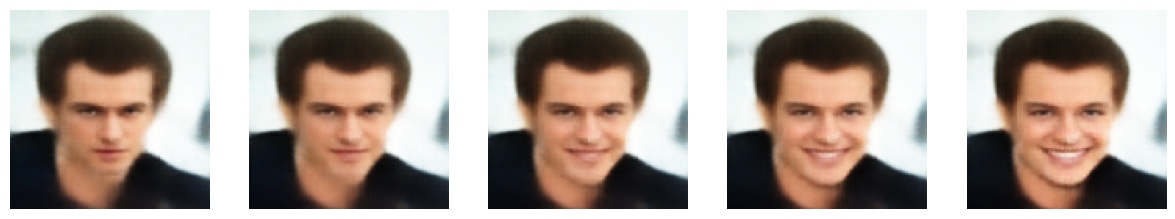

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import os
from glob import glob
import gdown
import matplotlib.pyplot as plt

# image_file, z_start, z_end 값을 `12_deepfake.ipynb`실습 실행 부분에서 복사하여 업데이트 합니다.
image_file = '157420.jpg'
z_start = np.array([ 2.01453775e-01, -2.18193269e+00,  2.85115576e+00,  1.56746554e+00,
       -2.81600881e+00, -1.19569492e+00,  6.05091333e-01, -1.80270553e-01,
       -7.12829083e-02,  9.40927207e-01, -1.13321662e-01, -2.98080623e-01,
        2.97727823e-01,  2.60258174e+00, -1.44896552e-01, -4.35417593e-02,
        1.79212344e+00,  1.45197332e+00,  1.34161949e-01,  1.48641944e+00,
       -8.22336078e-01, -1.32620823e+00, -1.87057447e+00, -1.04452550e+00,
        2.48134688e-01, -7.42016673e-01,  5.07872522e-01, -2.19587874e+00,
        2.21584231e-01, -6.69731319e-01, -1.51580274e+00, -1.72412857e-01,
        4.21903253e-01, -2.47691321e+00,  8.92331004e-02, -1.26005197e+00,
       -1.11706114e+00, -1.30968237e+00, -9.51119810e-02,  1.27060950e+00,
       -9.29458886e-02,  7.86278486e-01,  1.64022878e-01, -1.48250186e+00,
       -1.45750391e+00, -5.05983233e-01,  3.79621945e-02, -1.29252505e+00,
        6.37605965e-01, -1.95766854e+00,  1.52896023e+00,  2.61599135e+00,
        1.01798427e+00,  9.37976837e-02,  3.31234485e-01,  7.01737642e-01,
       -2.84476876e-01,  9.64379847e-01,  2.20211923e-01, -5.19417048e-01,
        7.93820798e-01, -2.00254154e+00, -3.78586441e-01, -1.73141360e+00,
       -1.47842503e+00,  1.16757023e+00, -1.39140368e+00,  1.01035631e+00,
       -2.35656351e-01,  5.52684665e-02,  6.35929585e-01,  1.00254431e-01,
       -2.39830613e+00, -5.04699230e-01, -1.13905656e+00, -2.32136533e-01,
       -1.12050033e+00, -1.79856443e+00, -2.78467417e-01,  3.19717824e-01,
        4.95800711e-02,  2.37262511e+00, -4.91384864e-01, -1.64373446e+00,
       -8.49641383e-01,  2.80419618e-01, -1.12403131e+00, -8.31069052e-02,
        1.22264236e-01, -7.51983345e-01,  1.16609538e+00, -4.54742074e-01,
       -1.28236103e+00,  5.17814398e-01, -1.44203901e+00,  1.20015705e+00,
       -1.69750154e-02, -2.42573991e-01,  1.52043477e-02, -1.80849195e-01,
        2.74563491e-01, -1.26736176e+00,  7.80580461e-01, -8.78100216e-01,
        2.80858964e-01, -1.66416478e+00, -1.52948833e+00, -5.90985045e-02,
        7.42850006e-02,  8.94545555e-01,  8.10104072e-01,  1.15550172e+00,
        1.84387282e-01,  9.36619759e-01,  4.42495680e+00, -2.34271944e-01,
       -1.31665134e+00, -7.48972833e-01,  1.34544015e-01, -3.21023166e-03,
       -8.25374722e-01, -2.66587079e-01,  7.31837451e-01, -1.50788200e+00,
       -2.20056057e+00, -4.53386307e-01,  1.03975701e+00, -1.37464553e-02,
       -7.57683337e-01, -4.89832044e-01,  1.49103224e-01, -1.54431069e+00,
        2.20435381e+00, -1.08516634e+00, -8.35014939e-01, -1.70764238e-01,
       -3.99297327e-01,  1.27663052e+00, -4.03723389e-01, -5.59489727e-02,
       -3.65331352e-01,  1.46231055e+00,  9.17812228e-01, -1.24768019e-02,
        2.28958398e-01,  4.96966183e-01,  5.01095891e-01, -2.77024126e+00,
       -1.96245456e+00,  1.63061190e+00,  5.15662909e-01, -1.00437045e+00,
        9.27312255e-01, -6.31682932e-01, -9.86789346e-01, -1.09587502e+00,
       -1.47974265e+00,  1.18834615e+00,  1.12977278e+00, -5.12692332e-01,
       -1.67392874e+00, -7.21708715e-01, -1.21527565e+00, -6.40339851e-02,
       -2.04062909e-01, -1.51240975e-01, -1.48081660e-01, -6.09448671e-01,
       -2.79955912e+00,  8.82744431e-01,  8.47365141e-01, -3.13095897e-01,
        6.69813871e-01, -4.09711838e-01, -1.12228525e+00, -2.61624575e-01,
        4.07670021e-01,  8.07438970e-01, -6.87685966e-01,  2.14611620e-01,
        2.09370375e+00, -9.55562115e-01,  2.65621483e-01, -1.44876695e+00,
       -1.16057563e+00, -1.48004100e-01, -7.50575185e-01, -1.00451112e+00,
       -1.20431709e+00,  2.68139839e+00, -1.03330880e-01, -1.14026475e+00,
        2.08931279e+00, -9.70981956e-01,  1.31314844e-01,  1.96696901e+00,
       -3.28297764e-01, -1.76776075e+00, -1.05558857e-02,  1.06142491e-01],
      dtype='float32')
z_end = np.array([ 2.09499970e-01, -2.34983945e+00,  2.85226059e+00,  1.55264091e+00,
       -2.15771103e+00, -1.13464987e+00,  9.17491794e-01, -2.58313686e-01,
       -5.38243279e-02,  8.63993347e-01, -3.28344882e-01, -3.93665969e-01,
        4.89563644e-01,  3.60922098e+00, -9.82208997e-02, -3.89406830e-02,
        1.82183766e+00,  1.40660071e+00,  4.94628847e-02,  1.51565087e+00,
       -8.10446560e-01, -1.32406402e+00, -1.50106311e+00, -1.06358409e+00,
        3.50698650e-01, -5.82160413e-01,  5.25487840e-01, -2.23828483e+00,
        2.58964002e-01, -5.04066050e-01, -1.07726943e+00, -2.34632045e-02,
        1.96858287e-01, -1.97672796e+00,  5.49526252e-02, -1.24015903e+00,
       -1.16187167e+00, -1.16625440e+00, -1.36958256e-01,  1.23549294e+00,
       -1.95147157e-01,  7.85468996e-01,  1.03404015e-01, -1.55560100e+00,
       -1.37301278e+00, -4.66419458e-01, -1.61331259e-02, -7.36055493e-01,
        5.89728653e-01, -1.93670774e+00,  1.63404167e+00,  2.70993376e+00,
        9.64452565e-01, -2.34189853e-02,  2.68151820e-01,  6.57102883e-01,
       -3.16674858e-01,  8.70644271e-01,  2.63998806e-01, -5.54329336e-01,
        7.38506436e-01, -1.79382372e+00, -4.60242331e-01, -1.69293416e+00,
       -1.43101299e+00,  1.17099500e+00, -1.28616047e+00,  6.82568192e-01,
       -1.88904628e-01,  1.73695907e-01,  6.44838512e-01,  3.34629238e-01,
       -2.43202543e+00, -2.78551161e-01, -1.09818566e+00, -2.59349227e-01,
       -1.24628210e+00, -1.65137613e+00, -3.32778156e-01, -1.77917153e-01,
       -3.66688892e-03,  2.16379189e+00, -5.79140186e-01, -1.64889526e+00,
       -7.93832302e-01,  2.93112397e-01, -1.09556603e+00, -1.16919744e+00,
        2.03255117e-01, -7.36971319e-01,  9.84660506e-01, -3.16380590e-01,
       -4.76466894e-01,  4.40892190e-01, -1.54808116e+00,  1.20188332e+00,
       -5.79823703e-02, -1.67669266e-01, -9.02396999e-03, -1.29056901e-01,
        8.18663776e-01, -9.13304925e-01,  7.88543999e-01, -8.70758951e-01,
        6.49453223e-01, -1.60901654e+00, -9.62994277e-01,  4.95202839e-02,
       -4.43881780e-01,  8.13677609e-01,  8.49332929e-01,  1.10448706e+00,
        2.36847192e-01,  9.74607348e-01,  4.39856482e+00, -2.12956935e-01,
        7.55678415e-01, -7.04096377e-01, -2.59513855e-01,  9.18825269e-02,
       -8.45829725e-01, -3.84853780e-01,  6.15597546e-01, -1.32291341e+00,
       -2.35920811e+00, -4.45330530e-01,  1.09420049e+00, -9.83982980e-02,
       -7.86782086e-01, -4.71528113e-01,  8.26008543e-02, -1.60252810e+00,
        2.21145630e+00, -9.67239916e-01, -8.01041722e-01, -1.08818062e-01,
       -1.21211112e+00,  1.83920169e+00, -7.01449752e-01, -7.17248023e-02,
       -3.76449168e-01,  1.39140892e+00,  1.07115757e+00, -7.90080652e-02,
        2.03020200e-01,  4.95352417e-01,  4.70465630e-01, -3.06860614e+00,
       -1.76380801e+00,  1.56547928e+00,  4.52414006e-01, -9.88042414e-01,
        1.06258953e+00, -5.99715531e-01, -2.15568781e+00, -1.02989686e+00,
       -1.62439537e+00,  1.26562202e+00,  1.04720891e+00, -5.95664263e-01,
       -1.65036094e+00, -7.87082911e-01, -9.98118043e-01, -7.52198622e-02,
       -1.51749760e-01, -9.52300578e-02, -1.06722444e-01, -6.50535464e-01,
       -3.08422828e+00,  8.18276942e-01,  8.92496228e-01,  3.47229838e-03,
        7.61081338e-01, -3.29528898e-01, -1.09719861e+00, -2.36349568e-01,
        4.06467825e-01,  1.09789693e+00, -6.68197334e-01,  8.18026513e-02,
        2.00906634e+00, -8.83978367e-01, -2.90343106e-01, -1.57432532e+00,
       -1.35361409e+00, -2.24158466e-01, -4.98460442e-01, -1.03733230e+00,
       -1.16877294e+00,  2.21976233e+00, -3.71900350e-02, -1.19092119e+00,
        2.15930939e+00, -9.59603786e-01,  8.86180699e-02,  2.74397373e+00,
       -3.11639637e-01, -1.73989189e+00,  6.39275610e-02,  8.23147416e-01],
      dtype='float32')

INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

md5 = 'c26f1be89f836f799fd3005934f327a7'
url = 'https://drive.google.com/uc?id=1p55tpOsVcliNMLCbQF5ogqZ6tfQH_-nK'
output = 'vae_weights.tar.gz'

# 모델 weights 다운로드
gdown.cached_download(url, output, md5=md5)

# 폴더 만들기 (리눅스 명렁어 실행)
!rm -rf vae_data
!mkdir -p vae_data
# 다운로드한 압축 파일 해제 (리눅스 명령어 실행)
!tar xvzf vae_weights.tar.gz -C vae_data

class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon

z_dim = 200
r_loss_factor = 10000

encoder_input = keras.Input(shape=INPUT_DIM, name='encoder_input')
x = Conv2D(32, 3, strides=2, padding="same", name='encoder_conv_0')(encoder_input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_3')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder = keras.Model(encoder_input, [mu, log_var, z], name = 'encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t0')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(3, 3, strides=2, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEModel, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= r_loss_factor
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)

VAE = VAEModel(encoder, decoder)
LEARNING_RATE = 0.0005
VAE.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))

SAVE_FOLDER = 'vae_data'
save_folder = os.path.join(SAVE_FOLDER, 'weights')
VAE.load_weights(save_folder+'/'+'checkpoint')

smiling_vec = (z_end - z_start)/4
factors = [0,1,2,3,4]
fig = plt.figure(figsize=(18, 10))
for counter, factor in enumerate(factors):
    changed_z_point = z_start + smiling_vec * factor
    changed_image = VAE.decoder.predict(np.array([changed_z_point]))[0]
    img = changed_image.squeeze()
    sub = fig.add_subplot(1, len(factors) + 1, 1+counter)
    sub.axis('off')
    sub.imshow(img)


#  z텐서의 배열 내에 `attribute==1` 혹은 `attribute==-1`라는 boolean tensor를 입력하였습니다.
#  텐서의 배열에 boolean tensor를 넣으면 역할을 하는지 각자 공부해 보고 그 역할에 대해 `ans06`에 기입합니다.
ans06 = """
여기에 기입하세요.
"""

# `np.sum(z_POS, axis = 0)` 합계를 할 때에 `axis=0`을 주었습니다.
#  그 이유에 대해 생각해보고 `ans07`에 기입합니다.
ans07 = """
여기에 기입하세요.
"""

#  `if np.sum([movement_POS, movement_NEG]) < 0.08:` 이 조건을 만족시키면 평균 계산 루프가 중단되도록 되어 있습니다.
#  이 조건은 어떤 의미인지 `ans08`에 기입합니다.
ans08 = """
여기에 기입하세요.
"""

ans09 = image_file
ans10 = z_start.copy()
ans11 = z_end.copy()

**과제 내용**

이번 과제는 13주차 실습에 진행하였던, `12_deepfake.ipynb`에서 latent vector를 움직여서 얼굴의 특징을 변화시키는 내용입니다.  
`12_deepfake.ipynb` 노트북에서 실행하고 여러분이 직접 얼굴 이미지를 선택하여 그 데이터를 복사하고 소스코드를 분석하는 과제입니다.    

이 과제를 통하여, VAE의 소스코드를 조금 더 자세하게 이해하게 될 것입니다.

**1. `12_deepfake.ipynb`실습 파일을 열어서, 처음부터 차례차례 수행합니다.**  

중간에 **Training** cell은 실행하다가 중지해 주십시오. (미리 학습된 weights를 불러와서 진행할 것이기 때문입니다.)  
`def add_vector_to_images(feature_vec):`가 정의된 cell까지 실행해 주십시오.  
(실습파일을 진행할 때 gdown오류가 발생할 경우 `!pip install --upgrade gdown` 이 cell을 한번 실행 해 주십시오.  
오류가 발생하면 런타임=>런타임 다시시작을 선택하신후 처음부터 차근차근 진행하도록 합시다.)  

다음 cell은 평균 smiling vector를 추출하는 부분입니다.  
eyeglasses_vec를 구하는 부분을 comment out하고, smiling_vec를 구하는 부분을 수행하도록 다음과 같이 변경합니다.

```python
BATCH_SIZE = 500
# attractive_vec = get_vector_from_label('Attractive', BATCH_SIZE)
# mouth_open_vec = get_vector_from_label('Mouth_Slightly_Open', BATCH_SIZE)
smiling_vec = get_vector_from_label('Smiling', BATCH_SIZE)
# lipstick_vec = get_vector_from_label('Wearing_Lipstick', BATCH_SIZE)
# young_vec = get_vector_from_label('High_Cheekbones', BATCH_SIZE)
# male_vec = get_vector_from_label('Male', BATCH_SIZE)
# eyeglasses_vec = get_vector_from_label('Eyeglasses', BATCH_SIZE)
# blonde_vec = get_vector_from_label('Blond_Hair', BATCH_SIZE)
```
위와 같은 코드로 수정후에 실행합니다.  
이 코드는 Latent 공간에서 `Smiling` 벡터를 계산하고 산출할 것입니다.  
    
    
**2. `ImageLabelLoader()`함수를 읽고 이해합시다.**  

함수내에서 keras의 DataLoader 함수가 호출됩니다.  
DataLoader는 대용량의 학습데이터를 읽어들이는 모듈의 기본 형식 중 하나입니다.  
keras학습에서 자주 사용되므로, 많이 사용해보고 익숙해 질 필요가 있습니다.  
학습 데이터의 크기가 대용량이 되면, 거의 대부분 DataLoader의 형식으로 읽어서 `model.fit()`에 입력으로 사용합니다.  
학습이 진행되는 동안 GPU가 사용될 때, 남는 CPU자원을 활용하여 미리 데이터를 읽어서 학습 속도를 향상시키는 기능등으로 확장 가능하기 때문입니다.  
(이번 VAE에서는 이러한 prefetch의 기능은 사용하지 않았습니다.)  

함수내의 `flow_from_dataframe()` 라이브러리에 대해 학습합시다.  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe  
(번역본)  
https://keras.io/ko/preprocessing/image/  

`ImageLabelLoader()`함수는 두 종류로 데이터를 생성할 수 있도록 준비되어 있습니다. `build`시에 `label`을 지정하거나, 지정하지 않거나 할 경우 입니다.  
`label` 지정시에, `y_col=label`로서, CSV파일의 해당 column을 y값으로 반환합니다. 이 경우 `class_mode='raw'`를 이용합니다.  
이렇게 한 batch의 데이터를 loading하게 되면,
```python
data_flow_label = imageLoader.build(att, batch_size, label = label)
batch = next(data_flow_label) # 한 배치를 추출해서 가져옴.
```
`batch[0]`에는 이미지의 batch 데이터가, `batch[1]`에는 해당 칼럼의 속성값의 batch가 들어오게 됩니다.  
이렇게 준비한 데이터는 latent 공간에서 특징 벡터를 추출하는 `get_vector_from_label()`에서 사용됩니다.  

`label` 미지정시에는 `class_mode='input'`을 이용하고, 이 경우 `batch[0]`, `batch[1]` 모두 이미지 batch 데이터가 들어있습니다.  
실습 파일에서는 무작위로 이미지를 불러오는 부분에서 사용하였습니다.  

시간이 나시는 분들은 `flow_from_directory()`에 대해서도 공부합시다.  
(자주 사용되는 DataLoader입니다.)  
실습파일에서 학습 이미지를 불러오는 것에 사용되었습니다.  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory  
(번역본)  
https://keras.io/ko/preprocessing/image/   
    
    
**3. 실습파일에서 `get_vector_from_label()` 함수의 정의를 읽어보고 분석합니다.**  

`label`에 속성 column명이 지정되었을 경우, 해당 속성과 해당 속성이 없는 것을 분류하고 각각의 latent vector의 평균을 구한 후에,
두 평균 vector의 차이를 구하는 함수입니다.
해당 속성이 있는 것을 positive(`POS`), 없는 것을 negative(`NEG`)라고 변수명에 postfix로 사용하고 있습니다.  

먼저 충분한 갯수만큼 loop가 수행됩니다.
```python
while (current_n_POS < 10000):
```
다음은 이미지와 속성을 한 batch만큼 가져오는 DataLoader 부분입니다.
```python
batch = next(data_flow_label)
im = batch[0]
attribute = batch[1]
```
이제 이미지로부터 latent vector $z$를 출력합니다.  
```python
_,_,z = vae.encoder.predict(np.array(im))
```
다음은 z의 batch로부터 attribute가 positive인 경우와 negative인 경우로 데이터를 분리하는 모듈입니다.
```python
z_POS = z[attribute==1]
z_NEG = z[attribute==-1]
```
z텐서의 배열 내에 `attribute==1` 혹은 `attribute==-1`라는 boolean tensor를 입력하였습니다.  
텐서의 배열에 boolean tensor를 넣으면 역할을 하는지 각자 공부해 보고 그 역할에 대해 `ans06`에 기입합니다.

다음 부분은 계속해서 `POS`와 `NEG` 속성의 latent vector z를 계속 더하고 그 갯수를 기록해서 평균값을 계산할 수 있도록 합니다.
```python
if len(z_POS) > 0:
    current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
    current_n_POS += len(z_POS)
    new_mean_POS = current_sum_POS / current_n_POS
    movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

if len(z_NEG) > 0:
    current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
    current_n_NEG += len(z_NEG)
    new_mean_NEG = current_sum_NEG / current_n_NEG
    movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)
```
여기서 `np.sum(z_POS, axis = 0)` 합계를 할 때에 `axis=0`을 주었습니다.
그 이유에 대해 생각해보고 `ans07`에 기입합니다.  
`if np.sum([movement_POS, movement_NEG]) < 0.08:` 이 조건을 만족시키면 평균 계산 루프가 중단되도록 되어 있습니다.  
이 조건은 무엇을 의미하는지 `ans08`에 기입합니다.  

최종적으로 두 평균벡터의 차이를 계산한 후에 벡터를 normalize합니다. (길이가 1이되도록 만듭니다.)  
```python
current_vector = current_vector / current_dist
```
우리가 두 속성 차이 벡터의 방향만 알 수 있고, 그 절대 크기를 알 수 없으므로 latent vector에 이것을 가감할때에,  
적당한 factor를 곱해주면서 테스트 해 보아야 합니다.  
    
    
**4. 입력 이미지의 latent vector에 속성 vector를 더하는 함수**  

기존의 `add_vector_to_images()`함수를 약간 변형하여 `add_vector_to_images2()`함수를 만들었습니다.  
`12_deepfake.ipynb`에 cell을 추가하고 다음 코드를 추가합니다.  
```python
def add_vector_to_images2(feature_vec):
    n_to_show = 5
    factors = [0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    _,_,z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1
    for i in range(n_to_show):
        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:
            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1
    plt.show()
    return z_points  

print('Smiling Vector')
z_points = add_vector_to_images2(smiling_vec)  

idx = (data_flow_generic.batch_index - 1) * data_flow_generic.batch_size
idx_list = data_flow_generic.index_array[idx : idx + 5].tolist()
image_file_name = [data_flow_generic.filenames[j] for j in idx_list]
```

변경점은 factor를 -4부터 4까지 변화시키는 것이아니라 0부터 4까지만 변화시키도록 하였습니다.  
그리고 z_points를 출력하여, latent 벡터의 값 자체를 확인할 수 있도록 하였습니다.  
실습 파일에 위 cell을 추가하고 실행해 봅시다.  

무작위로 다섯개의 원본이미지와 그 이미지의 latent vector에 smiling vector를 더한 이미지를 출력하도록 하였습니다.  
마음에 드는 이미지의 변화가 나타났나요?  
혹시 마음에 들지 않으면 몇 번 더 cell을 재실행하면서 확인합시다.  
5개 중에 마음에 드는 이미지 번호를 선택합니다. (0번, 1번, 2번, 3번, 4번 중에 선택)  
먼저 맨 왼쪽의 원본이미지가 무표정이고 맨 오른쪽의 변화된 이미지가 웃는 얼굴이면 OK입니다.  
(얼굴은 여러분들의 취향이니, 여러분이 마음에 드는 이미지로 선택합시다.)  

다시 cell을 추가하고 다음의 코드를 추가합니다. 변수 `i`에는 여러분이 선택한 번호를 입력합니다. (0,1,2,3,4 중에 선택)  
다음 코드는 단순히 여러분이 선택한 것과 일치하는 지를 이미지 출력으로 확인하는 과정에 불과합니다.

```python
i = 0 # 몇번째 그림인지 선택하세요 0,1,2,3,4 중에 번호를 변경하세요.

# 여러분이 선택한 이미지가 맞는 지 확인하세요.
factors = [0,1,2,3,4]
img = plt.imread('./vae_data/celeb/img_align_celeba/%s'%image_file_name[i])
fig = plt.figure(figsize=(18, 10))
sub = fig.add_subplot(1, len(factors) + 1, 1)
sub.axis('off')        
sub.imshow(img)
for counter, factor in enumerate(factors):
    changed_z_point = z_points[i] + smiling_vec * factor
    changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]
    img = changed_image.squeeze()
    sub = fig.add_subplot(1, len(factors) + 1, 2+counter)
    sub.axis('off')
    sub.imshow(img)
```

선택이 끝나셨으면, cell을 다시 추가하고 다음의 코드를 실행합니다.

```python
print("image_file = '%s'"%image_file_name[i])
z = z_points[i]
z_start_str = 'z_start = np.'+repr(z).replace("float32", "'float32'")
print(z_start_str)
z_end_str = 'z_end = np.'+repr(z+4*smiling_vec).replace("float32", "'float32'")
print(z_end_str)
```
원본이미지 파일의 번호와 시작 latent vector, 끝 latent vector를 출력하는 코드입니다.  
출력 결과를 메모장에 복사하십시오.  
여기까지 수행하셨으면, `12_deepfake.ipynb`실습파일은 종료하셔도 됩니다.  
    
    
**5. 템플릿을 과제 기입란에 복사한 후에, 메모장에 복사해두었던 코드로 해당 데이터를 업데이트 하십시오.**  

템플릿의 코드는 실습파일의 VAE Model과 거의 동일합니다.  
코드내의 데이터 업데이트가 끝나면, 실행해서 동일한 얼굴이 생성되는 지 확인하세요.  
`image_file`과 `z_start`, `z_end`값을 `ans09`, `ans10`, `ans11`에 기록합니다. (이미 템플릿 코드에 포함되어 있습니다.)  
   
   
**6. 우리는 무엇을 얻었습니까?**  

실습 노트북과, 과제 노트북에서 서로 공유된 것은 Model과 그 weights(학습 저장 데이터)입니다.  
그 이외에는 `z_start`, `z_end`의 두 latent vector를 전달하였습니다. (이미지 파일명은 단순 참고용입니다.)   
이것으로 두 노트북사이에 시작과 끝, 두 개의 이미지를 다시 복원할 수 있습니다.  
혹은 여러분들이 과제 제출을 하게 되면 200개의 z값 만으로 저는 여러분이 선정한 이미지를 복원할 수 있습니다.

생성된 이미지는 (128,128,3)의 shape입니다. 이 데이터는 약 50KB입니다.
이 이미지를 JPEG으로 압축하더라도 약 3KB의 용량이 됩니다.  
하지만 전달된 데이터는 float32(4byte) 200개입니다. 총 800byte 입니다.  
얼굴 데이터 셋만을 대상으로 하였을 경우에는 압도적으로 적은 데이터로 얼굴 영상을 전달하였습니다.  
Autoencoder 혹은 Variational Autoencoder의 encoder와 decoder는 각각 영상의 압축 및 해제와 비슷한 기능을 한다고 하겠습니다.  
두 개의 이미지를 가지고 중간 이미지도 재생성 할 수 있다는 것은 보너스입니다.  
(첫번째 이미지가 `z_start`로 부터 생성된 것이고, 다섯번째 이미지가 `z_end`로부터 생성된 것이며, 중간의 세개는 latent공간 상의 중간 점들로부터 만들어진 것입니다.)

모두들 무뚝뚝한 얼굴 이미지를 웃는 얼굴 이미지로 바꾸는데 성공하셨나요?  
여러분의 앞날에도 항상 웃음이 가득하길 기원합니다.  

**과제 기입란**

Computing MD5: vae_weights.tar.gz
MD5 matches: vae_weights.tar.gz
x weights/
x weights/checkpoint
x weights/checkpoint.data-00000-of-00001
x weights/checkpoint.index
1/1 [==============================] - 0s 257ms/step


2023-12-07 16:39:18.761203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


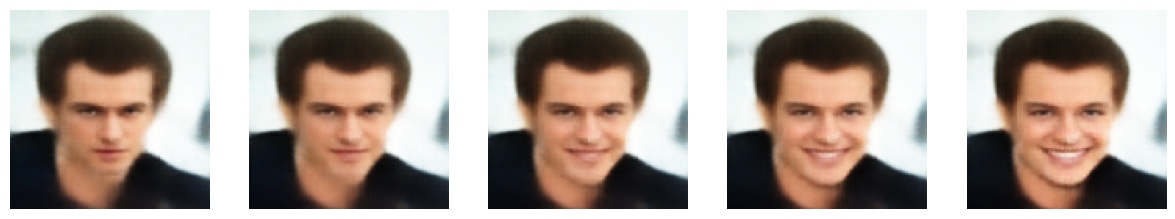

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import os
from glob import glob
import gdown
import matplotlib.pyplot as plt

# image_file, z_start, z_end 값을 `12_deepfake.ipynb`실습 실행 부분에서 복사하여 업데이트 합니다.
image_file = '157420.jpg'
z_start = np.array([ 2.01453775e-01, -2.18193269e+00,  2.85115576e+00,  1.56746554e+00,
                     -2.81600881e+00, -1.19569492e+00,  6.05091333e-01, -1.80270553e-01,
                     -7.12829083e-02,  9.40927207e-01, -1.13321662e-01, -2.98080623e-01,
                     2.97727823e-01,  2.60258174e+00, -1.44896552e-01, -4.35417593e-02,
                     1.79212344e+00,  1.45197332e+00,  1.34161949e-01,  1.48641944e+00,
                     -8.22336078e-01, -1.32620823e+00, -1.87057447e+00, -1.04452550e+00,
                     2.48134688e-01, -7.42016673e-01,  5.07872522e-01, -2.19587874e+00,
                     2.21584231e-01, -6.69731319e-01, -1.51580274e+00, -1.72412857e-01,
                     4.21903253e-01, -2.47691321e+00,  8.92331004e-02, -1.26005197e+00,
                     -1.11706114e+00, -1.30968237e+00, -9.51119810e-02,  1.27060950e+00,
                     -9.29458886e-02,  7.86278486e-01,  1.64022878e-01, -1.48250186e+00,
                     -1.45750391e+00, -5.05983233e-01,  3.79621945e-02, -1.29252505e+00,
                     6.37605965e-01, -1.95766854e+00,  1.52896023e+00,  2.61599135e+00,
                     1.01798427e+00,  9.37976837e-02,  3.31234485e-01,  7.01737642e-01,
                     -2.84476876e-01,  9.64379847e-01,  2.20211923e-01, -5.19417048e-01,
                     7.93820798e-01, -2.00254154e+00, -3.78586441e-01, -1.73141360e+00,
                     -1.47842503e+00,  1.16757023e+00, -1.39140368e+00,  1.01035631e+00,
                     -2.35656351e-01,  5.52684665e-02,  6.35929585e-01,  1.00254431e-01,
                     -2.39830613e+00, -5.04699230e-01, -1.13905656e+00, -2.32136533e-01,
                     -1.12050033e+00, -1.79856443e+00, -2.78467417e-01,  3.19717824e-01,
                     4.95800711e-02,  2.37262511e+00, -4.91384864e-01, -1.64373446e+00,
                     -8.49641383e-01,  2.80419618e-01, -1.12403131e+00, -8.31069052e-02,
                     1.22264236e-01, -7.51983345e-01,  1.16609538e+00, -4.54742074e-01,
                     -1.28236103e+00,  5.17814398e-01, -1.44203901e+00,  1.20015705e+00,
                     -1.69750154e-02, -2.42573991e-01,  1.52043477e-02, -1.80849195e-01,
                     2.74563491e-01, -1.26736176e+00,  7.80580461e-01, -8.78100216e-01,
                     2.80858964e-01, -1.66416478e+00, -1.52948833e+00, -5.90985045e-02,
                     7.42850006e-02,  8.94545555e-01,  8.10104072e-01,  1.15550172e+00,
                     1.84387282e-01,  9.36619759e-01,  4.42495680e+00, -2.34271944e-01,
                     -1.31665134e+00, -7.48972833e-01,  1.34544015e-01, -3.21023166e-03,
                     -8.25374722e-01, -2.66587079e-01,  7.31837451e-01, -1.50788200e+00,
                     -2.20056057e+00, -4.53386307e-01,  1.03975701e+00, -1.37464553e-02,
                     -7.57683337e-01, -4.89832044e-01,  1.49103224e-01, -1.54431069e+00,
                     2.20435381e+00, -1.08516634e+00, -8.35014939e-01, -1.70764238e-01,
                     -3.99297327e-01,  1.27663052e+00, -4.03723389e-01, -5.59489727e-02,
                     -3.65331352e-01,  1.46231055e+00,  9.17812228e-01, -1.24768019e-02,
                     2.28958398e-01,  4.96966183e-01,  5.01095891e-01, -2.77024126e+00,
                     -1.96245456e+00,  1.63061190e+00,  5.15662909e-01, -1.00437045e+00,
                     9.27312255e-01, -6.31682932e-01, -9.86789346e-01, -1.09587502e+00,
                     -1.47974265e+00,  1.18834615e+00,  1.12977278e+00, -5.12692332e-01,
                     -1.67392874e+00, -7.21708715e-01, -1.21527565e+00, -6.40339851e-02,
                     -2.04062909e-01, -1.51240975e-01, -1.48081660e-01, -6.09448671e-01,
                     -2.79955912e+00,  8.82744431e-01,  8.47365141e-01, -3.13095897e-01,
                     6.69813871e-01, -4.09711838e-01, -1.12228525e+00, -2.61624575e-01,
                     4.07670021e-01,  8.07438970e-01, -6.87685966e-01,  2.14611620e-01,
                     2.09370375e+00, -9.55562115e-01,  2.65621483e-01, -1.44876695e+00,
                     -1.16057563e+00, -1.48004100e-01, -7.50575185e-01, -1.00451112e+00,
                     -1.20431709e+00,  2.68139839e+00, -1.03330880e-01, -1.14026475e+00,
                     2.08931279e+00, -9.70981956e-01,  1.31314844e-01,  1.96696901e+00,
                     -3.28297764e-01, -1.76776075e+00, -1.05558857e-02,  1.06142491e-01],
                   dtype='float32')
z_end = np.array([ 2.09499970e-01, -2.34983945e+00,  2.85226059e+00,  1.55264091e+00,
                   -2.15771103e+00, -1.13464987e+00,  9.17491794e-01, -2.58313686e-01,
                   -5.38243279e-02,  8.63993347e-01, -3.28344882e-01, -3.93665969e-01,
                   4.89563644e-01,  3.60922098e+00, -9.82208997e-02, -3.89406830e-02,
                   1.82183766e+00,  1.40660071e+00,  4.94628847e-02,  1.51565087e+00,
                   -8.10446560e-01, -1.32406402e+00, -1.50106311e+00, -1.06358409e+00,
                   3.50698650e-01, -5.82160413e-01,  5.25487840e-01, -2.23828483e+00,
                   2.58964002e-01, -5.04066050e-01, -1.07726943e+00, -2.34632045e-02,
                   1.96858287e-01, -1.97672796e+00,  5.49526252e-02, -1.24015903e+00,
                   -1.16187167e+00, -1.16625440e+00, -1.36958256e-01,  1.23549294e+00,
                   -1.95147157e-01,  7.85468996e-01,  1.03404015e-01, -1.55560100e+00,
                   -1.37301278e+00, -4.66419458e-01, -1.61331259e-02, -7.36055493e-01,
                   5.89728653e-01, -1.93670774e+00,  1.63404167e+00,  2.70993376e+00,
                   9.64452565e-01, -2.34189853e-02,  2.68151820e-01,  6.57102883e-01,
                   -3.16674858e-01,  8.70644271e-01,  2.63998806e-01, -5.54329336e-01,
                   7.38506436e-01, -1.79382372e+00, -4.60242331e-01, -1.69293416e+00,
                   -1.43101299e+00,  1.17099500e+00, -1.28616047e+00,  6.82568192e-01,
                   -1.88904628e-01,  1.73695907e-01,  6.44838512e-01,  3.34629238e-01,
                   -2.43202543e+00, -2.78551161e-01, -1.09818566e+00, -2.59349227e-01,
                   -1.24628210e+00, -1.65137613e+00, -3.32778156e-01, -1.77917153e-01,
                   -3.66688892e-03,  2.16379189e+00, -5.79140186e-01, -1.64889526e+00,
                   -7.93832302e-01,  2.93112397e-01, -1.09556603e+00, -1.16919744e+00,
                   2.03255117e-01, -7.36971319e-01,  9.84660506e-01, -3.16380590e-01,
                   -4.76466894e-01,  4.40892190e-01, -1.54808116e+00,  1.20188332e+00,
                   -5.79823703e-02, -1.67669266e-01, -9.02396999e-03, -1.29056901e-01,
                   8.18663776e-01, -9.13304925e-01,  7.88543999e-01, -8.70758951e-01,
                   6.49453223e-01, -1.60901654e+00, -9.62994277e-01,  4.95202839e-02,
                   -4.43881780e-01,  8.13677609e-01,  8.49332929e-01,  1.10448706e+00,
                   2.36847192e-01,  9.74607348e-01,  4.39856482e+00, -2.12956935e-01,
                   7.55678415e-01, -7.04096377e-01, -2.59513855e-01,  9.18825269e-02,
                   -8.45829725e-01, -3.84853780e-01,  6.15597546e-01, -1.32291341e+00,
                   -2.35920811e+00, -4.45330530e-01,  1.09420049e+00, -9.83982980e-02,
                   -7.86782086e-01, -4.71528113e-01,  8.26008543e-02, -1.60252810e+00,
                   2.21145630e+00, -9.67239916e-01, -8.01041722e-01, -1.08818062e-01,
                   -1.21211112e+00,  1.83920169e+00, -7.01449752e-01, -7.17248023e-02,
                   -3.76449168e-01,  1.39140892e+00,  1.07115757e+00, -7.90080652e-02,
                   2.03020200e-01,  4.95352417e-01,  4.70465630e-01, -3.06860614e+00,
                   -1.76380801e+00,  1.56547928e+00,  4.52414006e-01, -9.88042414e-01,
                   1.06258953e+00, -5.99715531e-01, -2.15568781e+00, -1.02989686e+00,
                   -1.62439537e+00,  1.26562202e+00,  1.04720891e+00, -5.95664263e-01,
                   -1.65036094e+00, -7.87082911e-01, -9.98118043e-01, -7.52198622e-02,
                   -1.51749760e-01, -9.52300578e-02, -1.06722444e-01, -6.50535464e-01,
                   -3.08422828e+00,  8.18276942e-01,  8.92496228e-01,  3.47229838e-03,
                   7.61081338e-01, -3.29528898e-01, -1.09719861e+00, -2.36349568e-01,
                   4.06467825e-01,  1.09789693e+00, -6.68197334e-01,  8.18026513e-02,
                   2.00906634e+00, -8.83978367e-01, -2.90343106e-01, -1.57432532e+00,
                   -1.35361409e+00, -2.24158466e-01, -4.98460442e-01, -1.03733230e+00,
                   -1.16877294e+00,  2.21976233e+00, -3.71900350e-02, -1.19092119e+00,
                   2.15930939e+00, -9.59603786e-01,  8.86180699e-02,  2.74397373e+00,
                   -3.11639637e-01, -1.73989189e+00,  6.39275610e-02,  8.23147416e-01],
                 dtype='float32')

INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

md5 = 'c26f1be89f836f799fd3005934f327a7'
url = 'https://drive.google.com/uc?id=1p55tpOsVcliNMLCbQF5ogqZ6tfQH_-nK'
output = 'vae_weights.tar.gz'

# 모델 weights 다운로드
gdown.cached_download(url, output, md5=md5)

# 폴더 만들기 (리눅스 명렁어 실행)
!rm -rf vae_data
!mkdir -p vae_data
# 다운로드한 압축 파일 해제 (리눅스 명령어 실행)
!tar xvzf vae_weights.tar.gz -C vae_data

class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon

z_dim = 200
r_loss_factor = 10000

encoder_input = keras.Input(shape=INPUT_DIM, name='encoder_input')
x = Conv2D(32, 3, strides=2, padding="same", name='encoder_conv_0')(encoder_input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_3')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder = keras.Model(encoder_input, [mu, log_var, z], name = 'encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t0')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(3, 3, strides=2, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEModel, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= r_loss_factor
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)

VAE = VAEModel(encoder, decoder)
LEARNING_RATE = 0.0005
VAE.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))

SAVE_FOLDER = 'vae_data'
save_folder = os.path.join(SAVE_FOLDER, 'weights')
VAE.load_weights(save_folder+'/'+'checkpoint')

smiling_vec = (z_end - z_start)/4
factors = [0,1,2,3,4]
fig = plt.figure(figsize=(18, 10))
for counter, factor in enumerate(factors):
    changed_z_point = z_start + smiling_vec * factor
    changed_image = VAE.decoder.predict(np.array([changed_z_point]))[0]
    img = changed_image.squeeze()
    sub = fig.add_subplot(1, len(factors) + 1, 1+counter)
    sub.axis('off')
    sub.imshow(img)


#  z텐서의 배열 내에 `attribute==1` 혹은 `attribute==-1`라는 boolean tensor를 입력하였습니다.
#  텐서의 배열에 boolean tensor를 넣으면 역할을 하는지 각자 공부해 보고 그 역할에 대해 `ans06`에 기입합니다.
ans06 = """
여기에 기입하세요.
"""

# `np.sum(z_POS, axis = 0)` 합계를 할 때에 `axis=0`을 주었습니다.
#  그 이유에 대해 생각해보고 `ans07`에 기입합니다.
ans07 = """
여기에 기입하세요.
"""

#  `if np.sum([movement_POS, movement_NEG]) < 0.08:` 이 조건을 만족시키면 평균 계산 루프가 중단되도록 되어 있습니다.
#  이 조건은 어떤 의미인지 `ans08`에 기입합니다.
ans08 = """
여기에 기입하세요.
"""

ans09 = image_file
ans10 = z_start.copy()
ans11 = z_end.copy()

# 3번과제 - Fast Gradient Signed Method (34점)



**템플릿**

In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                 weights='imagenet')
pretrained_model.trainable = False

# ImageNet 클래스 레이블
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# 이미지가 MobileNetV2에 사용하기 위한 level normalization 및 size normalization 함수
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image

# 예측 결과로부터 top1을 뽑아서 라벨을 출력하는 함수
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

# Labrador Retreiver 이미지 불러오기
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
# 추론
image_probs = pretrained_model.predict(image)

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # 입력 이미지에 대한 손실 함수의 기울기를 구합니다.
  gradient = tape.gradient(loss, input_image)
  # 왜곡을 생성하기 위해 그래디언트의 부호를 구합니다.
  signed_grad = tf.sign(gradient)
  return signed_grad

# 인식하고 이미지 출력하는 함수 (label과 confidence를 반환하도록 변경)
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()
  return label, confidence

# 이미지의 레이블 위치만 1로 설정 (기본적인 클래스 분류기 결과)
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

confidence1 = confidence2 = confidence3 = 0.

# 공격 패턴 생성
perturbations = create_adversarial_pattern(image, label)

epsilons = [0, 0.01, 0.1, 0.15]
# epsilon은 0.01로 고정
eps = epsilons[1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

#원본 인식 (epsilon = 0)
display_images(image, descriptions[0])

#공격 진행
adv_x = image + eps*perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
label0, confidence0 = display_images(adv_x, descriptions[1]) # epsilon = 0.01

# FSGM 결과
print('FSGM result:')
print(label0, confidence0)

################################################################

# 원본의 인식 결과를 후보1부터 후보4까지 출력
print('')
print('Original results top4:')
res = decode_predictions(image_probs, top=4)
print(res[0])

# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]

# top4의 index를 출력
print('top4 class index :', top[:4])

# 추론 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)

# model predict의 결과인 `image_probs[0]`에는 무엇이 들어있습니까?
ans12 = '''
여기에 기입합니다.
'''

# np.argsort(image_probs[0])[::-1]는 무엇을 얻기 위한 것입니까?
ans13 = '''
여기에 기입합니다.
'''

# top2 결과인 `eskimo_dog`의 class index는 얼마입니까?
ans14 = -1 # 값을 변경해 주세요.

# 원본이미지를 인식하였을 때, 4번째로 높은 추론값을 가진 결과(top4)는 무엇이었습니까?
# 인덱스 값으로 적어 주세요
ans15 = -1 # 값을 변경해 주세요.


# 이곳에 top2 index를 이용한 공격 code snippte을 추가합니다.

# 이곳에 top3 index를 이용한 공격 code snippte을 수정하여 추가합니다.

# 이곳에 top4 index를 이용한 공격 code snippte을 수정하여 추가합니다.

# 공격 결과 중 confidence score를 다음 변수에 기록합니다.
ans16 = confidence1 # top2 index를 이용한 공격결과의 confidence score
ans17 = confidence2 # top3 index를 이용한 공격결과의 confidence score
ans18 = confidence3 # top4 index를 이용한 공격결과의 confidence score

# 본 과목을 수강하시면서 느낀점, 의견 등이 있으시면 적어 주세요. (공란으로 두셔도 됩니다.)
ans19 = """
여기에 적어주세요.
"""

**과제 내용**  

이번 과제는 FGSM의 공격 패턴을 다양화하는 것입니다.  
강의 중의 공격은 원래의 결과가 나오는 것을 방해합니다. (원래 결과의 Loss를 증가하도록 패턴 생성)  
이번 과제는 원래의 결과중에 두번째, 세번째, 네번째 후보 중에 원하는 결과가 나오도록 공격 패턴을 생성합니다.  
(이 과제를 통하여 FGSM의 원리를 보다 더 깊이 이해할 수 있게 됩니다.)  

템플릿의 코드는 `13_fun_topics.ipynb` 실습 코드와 거의 동일합니다.  

다만 $\epsilon$을 0.01로 고정하였습니다.

**1. FGSM의 간단 리뷰**  

원본 이미지(Labrado retriever)를 추론하고 원본 Label(208번)을 이용한 학습데이터 생성.  
추론값, GT(208 one-hot-encoding)를 이용한 손실함수의 정의(cross entropy).  
손실함수를 모델의 weights가 아닌 입력 이미지에 대해 gradient 계산 => perturbation으로 정의.  
원본 이미지에 $\epsilon$ $\cdot$ `pertrubation`을 **더하기** (손실의 증가)하여 공격 완성.

**2. FGSM은 원본 이미지에 공격 pattern을 주입함으로서 결과추론을 어렵게 하였습니다.**  

이것은 원래 추론결과와 다른 결과를 만들어 내는 것이 공격의 목표였습니다.  
이를 이용하여, 원하는 결과를 도출할 수 있는 간단한 실험을 해 보도록 하겠습니다.  
원리는 다음과 같습니다.  
먼저 원본 인식결과와는 다른 target label을 선정합니다.  
그리고 동일하게 추론 결과와 target label을 이용하여 손실함수(cross entropy)를 정의합니다.  
이것을 이용한 gradient를 계산하고 부호부분만을 계산하여 target_perturbation을 정의합니다.  
원본 이미지에 $\epsilon$ $\cdot$ `target_pertrubation`을 **빼기** 하여 target의 확률을 높입니다.
   
**3. FGSM은 매우 간단한 공격 방법으로 임의의 라벨로 변경하기는 까다롭습니다.**  

따라서 원래 원본 이미지의 결과 중에서 원래 결과인 top1대신 top2, top3, top4를 선택하여 공격자가 원하는 결과로 바꿔 보도록 하겠습니다.  
이를 위하여 template에서 top1부터 top4까지의 결과 및 label index를 출력하도록 템플릿에 마지막 코드를 추가해 두었습니다.  
다음은 템플릿 코드의 일부입니다.    
```python
res = decode_predictions(image_probs, top=4)
print(res[0])
# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]
# top4만을 출력
print(top[:4])
# pred(추론) 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)
```
위의 템플릿 코드를 읽고 분석합니다.  
model predict의 결과인 `image_probs[0]`에는 무엇이 들어있습니까?  
`ans12`에 기입합니다.  
`np.argsort(image_probs[0])[::-1]`는 무엇을 얻기 위한 것입니까?  
`ans13`에 기입합니다.  
top1 결과는 당연히 Labrado retriever입니다.
top2 결과인 `eskimo_dog`의 class index는 얼마입니까?  
(템플릿 코드를 실행해보시면 알 수 있습니다.)  
`ans14`에 그 index값을 기록합니다.  
원본이미지를 인식하였을 때, 4번째로 높은 추론값을 가진 결과(top4)는 무엇이었습니까?   
그 index 값을 `ans15`에 기록합니다.  
(참고로 강의에서 소개하였던 2010년부터의 imagenet competition은 top5내에 정답이 있으면, 맞는 것으로 하였었습니다.)  
    
**4. 이제 top2의 index를 이용하여, 원본 이미지에 대한 gradient를 구하고 그 부호값만을 취하여 target_perturabtion으로 정의하겠습니다.**  

다음의 code snippet을 템플릿의 맨 뒤에 추가합니다.    
**top2결과가 top1으로 나오게 하는 공격 snippet**  
```python
#top2 용 label 생성
target1_index = 248
target1_label = tf.one_hot(target1_index, image_probs.shape[-1])
target1_label = tf.reshape(target1_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target_perturbations = create_adversarial_pattern(image, target1_label)
adv_x = image - eps*target_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)  
# 공격 패턴이 적용된 이미지 adv_x에 대한 추론 및 결과 디스플레이
label1, confidence1 = display_images(adv_x, descriptions[1])
# FSGM 결과
print(label1, confidence1)
```

`adv_x`를 계산할 때 `image - eps*target_perturbations`에서 보듯이 `-`(minus)가 사용되었습니다.  
`confidence1`의 결과를 `ans16`에 저장합니다. (템플릿에 이미 추가되어 있습니다.)    
    
**5. 위의 <공격 snippet>을 수정하여 top3의 index를 이용한 공격코드 및 결과코드를 추가합니다.**   

**공격 snippet**에서 `target2_index`, `targe2_label`등으로 변경하여 추가하시면 됩니다.  
label과 confidence값도 `label2`, `confidence2` 등으로 변경합니다  
`target2_index`의 값은 원본의 인식결과로 부터 출력된 top2의 index값으로 변경합니다.  
(snippet의 여러부분을 수정해야 하므로 실수하지 않도록 꼼꼼하게 확인합시다.)

**6. 위의 <공격 snippet>을 수정하여 top4의 index를 이용한 공격코드 및 결과코드를 추가합니다.**   

**공격 snippet**에서 `target3_index`, `targe3_label`등으로 변경하여 추가하시면 됩니다.  
label과 confidence값도 `label3`, `confidence3` 등으로 변경합니다  
`target3_index`의 값은 원본의 인식결과로 부터 출력된 top3의 index값으로 변경합니다.  
(snippet의 여러부분을 수정해야하므로 실수하지 않도록 꼼꼼하게 확인합시다.)

top3의 label을 이용한 결과인 `confidence2`를 `ans17`에, top4의 label을 이용한 `confidence3`를 `ans18`에 저장합니다.  
(이미 템플릿에 포함되어 있읍니다.)  

수정된 코드가 정상적으로 수행되면 총 다섯 개의 이미지와 결과가 출력될 것입니다.
맨처음 2개는 원본의 인식결과와, 템플릿에 있는 공격결과입니다.
다음 3개는 top2, top3, top4의 결과가 나오도록 하는 공격입니다.

원하는 공격 결과가 도출되었습니까?  

**과제 기입란**


In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#

# 과제 제출 방법

**다음은 답안의 형식을 확인하는 코드입니다. 실행해서 오류가 없는 지 확인합시다.**

In [ ]:
# 답안의 형식을 점검합니다.

from tensorflow import keras
import numpy as np

error = False

try:
    if type(ans01) != str:
        raise
except:
    error = True
    print('ans01 error')

try:
    if type(ans02) != str:
        raise
except:
    error = True
    print('ans02 error')

try:
    if ans03.shape != (5000, 2):
        raise
except:
    error = True
    print('ans03 error')

try:
    if type(ans04) != str:
        raise
except:
    error = True
    print('ans04 error')

try:
    if type(ans05) != str:
        raise
except:
    error = True
    print('ans05 error')

try:
    if type(ans06) != str:
        raise
except:
    error = True
    print('ans06 error')

try:
    if type(ans07) != str:
        raise
except:
    error = True
    print('ans07 error')

try:
    if type(ans08) != str:
        raise
except:
    error = True
    print('ans08 error')

try:
    if type(ans09) != str:
        raise
except:
    error = True
    print('ans09 error')

try:
    if ans10.shape != (200,):
        raise
except:
    error = True
    print('ans10 error')

try:
    if ans11.shape != (200,):
        raise
except:
    error = True
    print('ans11 error')

try:
    if type(ans12) != str:
        raise
except:
    error = True
    print('ans12 error')

try:
    if type(ans13) != str:
        raise
except:
    error = True
    print('ans13 error')

try:
    if not isinstance(ans14, int):
        raise
except:
    error = True
    print('ans14 error')

try:
    if not isinstance(ans15, int):
        raise
except:
    error = True
    print('ans15 error')

try:
    if not isinstance(ans16, float) and not isinstance(ans16, np.float32):
        raise
except:
    error = True
    print('ans16 error')

try:
    if not isinstance(ans17, float) and not isinstance(ans17, np.float32):
        raise
except:
    error = True
    print('ans17 error')

try:
    if not isinstance(ans18, float) and not isinstance(ans18, np.float32):
        raise
except:
    error = True
    print('ans18 error')

try:
    if not isinstance(ans19, str):
        raise
except:
    error = True
    print('ans19 error')

if error:
    print('답안을 확인하여 주세요')
else:
    print('답안의 형식 확인이 완료되었습니다.')

**과제 제출 방법**

1. **런타임** -> **다시 시작 및 모두 실행**을 수행하여 정상적으로 결과가 출력되는 지 다시 한번 확인합니다.  

2. **수정** -> **모든 출력 지우기**를 선택하여 cell의 출력을 지웁니다.

3. **파일** -> **`.ipynb`** 다운로드를 선택하여 노트북을 다운로드 합니다.

4. 파일 이름을 학번으로 변경합니다. 예) `202099999.ipynb`

5. 노트북 파일을 제출하시면 됩니다.